In [1]:
import matplotlib.pylab as plt
import numpy as np
get_ipython().magic('matplotlib inline')

# 1. Analytical solution of model task

In [9]:
# Coefs in model task
k1 = np.sqrt(np.exp(1))
q1 = np.sqrt(np.exp(1))
f1 = np.cos(0.5)

d1 = 1
d2 = 1
e1 = 0
e2 = 1

l1 = np.sqrt(q1/k1)
l2 = - np.sqrt(q1/k1)

up = f1/q1

In [10]:
coef1 = ((k1*l2 +d2)*(d1*f1-e1*q1)*np.exp(l2)+(k1*l2-d1)*(d2*f1-e2*q1))/(q1*((k1*l1-d1)*(k1*l2+d2)*np.exp(l2)-(k1*l2 -d1)*(k1*l1+d2)*np.exp(l1)))
coef2 = ((k1*l1 +d2)*(d1*f1-e1*q1)*np.exp(l1)+(k1*l1-d1)*(d2*f1-e2*q1))/(q1*((k1*l2-d1)*(k1*l1+d2)*np.exp(l1)-(k1*l2 +d2)*(k1*l1-d1)*np.exp(l2)))


In [11]:
def anmodel(x):
    u = coef1*np.exp(l1*x) + coef2*np.exp(l2*x) + up
    return u

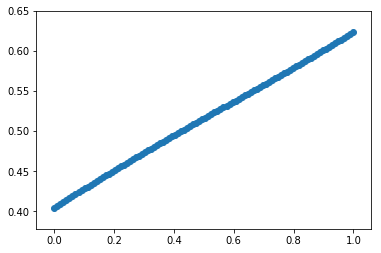

In [14]:
f_x = []
z = np.linspace(0,1,100)
for i in z:
    f_x.append(anmodel(i))
plt.scatter(z, f_x)



# 2. Numerical solution of model task

In [15]:
# Tridiagonal matrix algorithm (метод прогонки)

def nummodel(L):
    x = [None] * (L+1)
    a = [None] * (L+1)
    b = [None] * (L+1)
    c = [None] * (L+1)
    d = [None] * (L+1)
    u = [None] * (L+1)
    alp = [None] * (L+1)
    bet = [None] * (L+1)

    h = 1/L

    x[0] = 0
    x[L] = 1

    for l in range(1,L):
        x[l] = l*h
    
    a[0] = k1
    b[0] = -k1 -d1*h -q1*h**2/2
    c[0] = 0
    d[0] = -e1*h - f1*h**2/2

    a[L] = 0
    b[L] = -k1 -d2*h -q1*h**2/2
    c[L] = k1
    d[L] = -e2*h - f1*h**2/2

    for l in range(1,L):
        a[l] = k1
        b[l] = -2*k1 -q1*h**2
        c[l] = k1
        d[l] = -f1*h**2


    alp[0] = -a[0]/b[0]
    bet[0] = d[0]/b[0]

    for l in range(1,L):
        alp[l] = -a[l]/(b[l]+c[l]*alp[l-1])
        bet[l] = (d[l]-c[l]*bet[l-1])/(b[l]+c[l]*alp[l-1])

    
    #Compute the values of function
    u[L] = (d[L] - c[L]*bet[L-1])/(b[L]+c[L]*alp[L-1])

    for l in reversed(range(0,L)):
        u[l] = alp[l]*u[l+1] + bet[l]
    return (abs(u[L] - anmodel(1)),x,u)

In [16]:
nummodel(10)

(0.00012988100844857353,
 [0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1],
 [0.40464032161593327,
  0.42854479569453907,
  0.4514119104279336,
  0.47347033696345081,
  0.4949406595664459,
  0.51603758146294876,
  0.53697207187192453,
  0.55795347569746301,
  0.57919160697781946,
  0.60089884702579754,
  0.62329226824187689])

0.000129881008449
1.30090214079e-06
L = 100


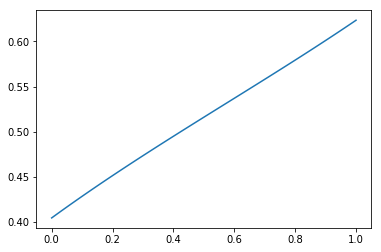

In [17]:
eps = 0.00001
L=10
while nummodel(L)[0]> eps:
    print (nummodel(L)[0])
    L=L*10
else:
    print(nummodel(L)[0])
    print("L =", L)
    plt.plot(nummodel(L)[1], nummodel(L)[2])


# 3. Numerical solution of the task

In [18]:
def k(x):
    return(x+1)
def q(x):
    return(x)
def f(x):
    return(np.exp(-x**2))

In [19]:
L = 100
def func(L):
    h = 1/L

    x = [None] * (L+1)
    a = [None] * (L+1)
    b = [None] * (L+1)
    c = [None] * (L+1)
    d = [None] * (L+1)
    u = [None] * (L+1)
    alp = [None] * (L+1)
    bet = [None] * (L+1)

    x[0] = 0
    x[L] = 1

    for l in range(1,L):
        x[l] = l*h

    a[0] = k(0)
    b[0] = -k(0) -d1*h
    c[0] = 0
    d[0] = -e1*h

    a[L] = 0
    b[L] = -k(1) -d2*h
    c[L] = k(1)
    d[L] = -e2*h

    for l in range(1,L):
        a[l] = k(l*h + h/2)
        b[l] = -(k(l*h+h/2)+k(l*h-h/2)+q(l*h)*h**2)
        c[l] = k(l*h - h/2)
        d[l] = - f(l*h)*h**2
        
    ind = 1
    for l in range(0,L+1):
        if (abs(b[l])< abs(a[l])+abs(c[l])):
            ind = 0

    alp[0] = -a[0]/b[0]
    bet[0] = d[0]/b[0]

    for l in range(1,L):
        alp[l] = -a[l]/(b[l]+c[l]*alp[l-1])
        bet[l] = (d[l]-c[l]*bet[l-1])/(b[l]+c[l]*alp[l-1])

    
    #Compute the values of function
    u[L] = (d[L] - c[L]*bet[L-1])/(b[L]+c[L]*alp[L-1])

    for l in reversed(range(0,L)):
        u[l] = alp[l]*u[l+1] + bet[l]
    return(x,u,u[L],ind)

In [20]:
L1 = 10
L2 = 20
eps = 0.5
while(1):
    if ((abs((func(L1)[2]) - func(L2)[2])) < eps):
        break
    else:
        print ("Difference: ",(abs((func(L1)[2]) - func(L2)[2])))
        print(L1)
        print(L2)
        L1  *= 2
        L2 *= 2

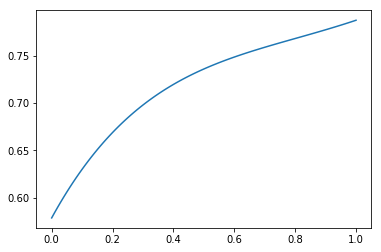

In [21]:
plt.plot(func(L)[0], func(L)[1])

In [13]:
print(func(L2)[3])

1
